# A light weight Web Service of time series of Earth observation data



## The E-SENSING project
## Data & services

The e-sensing project is about developing new ways to extract information on land use and land cover change from big Earth Observation data sets. We address the following scientific question: 

***How can we use e-science methods and techniques to improve the extraction of land use and land cover change information from big Earth Observation data sets in an open and reproducible way?*** 

To answer this, our project is building a new generation of knowledge platform for handling big geospatial data. We're conceiving, building, and deploying a new type of knowledge platform for accessing, processing and analysing big Earth Observation data.

We assume that decades of satellite images can be effectively organized into a data structure which can be efficietly queried and processed using the array data model. 

<img src="img/datacube.png" alt="A data cube of satellite images is as an array" title="data cube" height="300" width="400" />

Our approach is to put data and analysis together to help scietists to do larger, longer, and faster research on land use and land cover change.

<img src="img/architecture.png" alt="e-sensing project's architecture " title="e-sensing architecture" height="300" width="400" />

The "e-sensing" project is supported by __[FAPESP](http://bv.fapesp.br/pt/auxilios/89598/e-sensing-analise-de-grandes-volumes-de-dados-de-observacao-da-terra-para-informacao-de-mudancas-de/)__, under the  __[e-science program](http://www.fapesp.br/8436)__ .

For additional info, please visits us at:

- our  __[official page](http://esensing.org/)__ 
- our code at __[github](https://github.com/e-sensing/)__
- our project at __[research gate](https://www.researchgate.net/project/e-sensing-big-earth-observation-data-analytics-for-land-use-and-land-cover-change-information-wwwesensingorg)__


### Web Time Series Service - WTSS

WTSS is a lightweight web service for handling time series data from remote sensing imagery. It exposes 3 operations:
- *list_coverages*: get the list of available coverages.
- *describe_coverage*: get metadata about a specific coverage.
- *time_series*: get a time series for a given location and time interval.

WTSS is developed and maintained by the National Institute for Space Research of Brazil __[INPE](http://www.inpe.br/)__, where we have a WTSS instance running. 

For additional details such as the source code adn the WTSS clients for Python, R, and Javascript go to the __[WTSS repository](https://github.com/e-sensing/tws/tree/master/src/tws/wtss)__

If you are instersted on setting your own WTSS, you can conctact us through the __[e-sensing](http://esensing.org/)__ links provided above.

In [277]:
%matplotlib inline
# configuration

#import pip
#def install(package):
#   pip.main(['install', package])
#install('wtss')
#install('pandas')
#install('numpy')
#install('scipy')

import numpy as np
import scipy as sp
import pandas as pd
import math
import matplotlib
from scipy import stats
from wtss import wtss

matplotlib.style.use('ggplot')

### WTSS for python
The __[python client](https://github.com/e-sensing/wtss.py)__ for WTSS enables users to retrieve time series of Earth observation data for specific locations. Using a few lines of code, you can

#### List coverages
This operation gets a list of the data sets hosted in the WTSS

In [278]:
# WTSS python client: Access to data & metadata
w = wtss("http://www.dpi.inpe.br/tws")

# print the available data sets
cv_list = w.list_coverages()
for cv_name in cv_list["coverages"]:
    print(cv_name)

itobi
merge
mixl8mod
mixl8mod_f
mod13q1_512


#### Describe coverage
This operations enables users to explore the details of a data sets in the WTSS

In [279]:
# explore a WTSS data set
cv_scheme = w.describe_coverage("mod13q1_512")
# format response
print("ARRAY mod13q1_512")
print("\nSPATIAL REFERENCE SYSTEM:\n" + str(cv_scheme['crs']))
print("\nDIMENSIONS:\n" + str(cv_scheme['dimensions']))
print("\nTIMELINE:\nFirst 5:" + str(cv_scheme['timeline'][0:5]) + "...\nLast five: ..." + str(cv_scheme['timeline'][-5:]))
print("\nDESCRIPTION:\n" + str(cv_scheme['description']) + " - " + str(cv_scheme['detail']))

print("\nATTRIBUTES:")
for att in cv_scheme['attributes']:
    print(str(att['name']) + ": " + str(att['description']) + ". Type: " + str(att['datatype']))

ARRAY mod13q1_512

SPATIAL REFERENCE SYSTEM:
{u'proj4': u'+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs', u'wkt': u'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.01745329251994328,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]]'}

DIMENSIONS:
{u'y': {u'max_idx': 86399, u'min_idx': 0, u'name': u'row_id'}, u'x': {u'max_idx': 172799, u'min_idx': 0, u'name': u'col_id'}, u't': {u'max_idx': 376, u'min_idx': 0, u'name': u'time_id'}}

TIMELINE:
First 5:[u'2000-02-18', u'2000-03-05', u'2000-03-21', u'2000-04-06', u'2000-04-22']...
Last five: ...[u'2016-12-18', u'2017-01-01', u'2017-01-17', u'2017-02-02', u'2017-02-18']

DESCRIPTION:
Vegetation Indices 16-Day L3 Global 250m - https://lpdaac.usgs.gov/dataset_discovery/modis/modis_products_table/mod13q1

ATTRIBUTES:
ndvi: 250m 16 days NDVI. Type: int16
evi: 250m 16 days EVI. Type: int16
red: 250m 16 d

#### Time series
This operation retrives a time series of the provided point.

In [280]:
# get time series of a point
ts = w.time_series("mod13q1_512", ("ndvi", "evi"), -12.0, -54.0)

# build a data frame made of vegetation indexes
ndvi = pd.Series(ts["ndvi"], index = cv_scheme["timeline"])/10000
evi  = pd.Series(ts["evi"],  index = cv_scheme["timeline"])/10000

vidf = pd.DataFrame({'ndvi': ndvi, 'evi': evi})
vidf[0:5]

,evi,ndvi
2000-02-18,0.3227,0.5532
2000-03-05,0.3328,0.4512
2000-03-21,0.5831,0.8734
2000-04-06,0.4962,0.8865
2000-04-22,0.5341,0.8859


### Data visualization
***LUBIA*** WTSS integrates with SCIPY, pandas

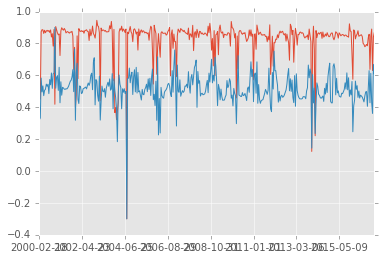

In [281]:
# Time series visualization
vidf['ndvi'].plot()
vidf['evi'].plot()

,evi,ndvi,ndvi_lm,evi_lm
2000-02-18,0.3227,0.5532,0.823311,0.530569
2000-03-05,0.3328,0.4512,0.823337,0.530492
2000-03-21,0.5831,0.8734,0.823364,0.530415
2000-04-06,0.4962,0.8865,0.823391,0.530339
2000-04-22,0.5341,0.8859,0.823417,0.530262


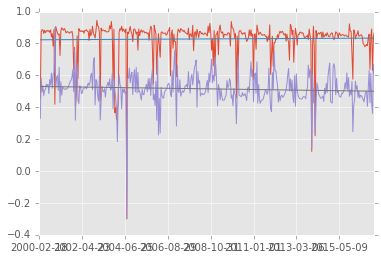

In [282]:
# fit a line to a time series
def fitline(vi):
    vi = pd.Series(vi.values, index = range(len(vi.values)))                       # re-build the series
    obid = pd.Series(range(len(vi.values)), index = range(len(vi.values)))         # add an index to the series
    sl, it, r, p, sde = stats.linregress(x = range(len(vi.values)), y = vi.values) # fit the line
    lmdf = pd.DataFrame({'obid': obid, 'vi': vi})                                  # build a data frame
    lmdf['vi_lm'] = fdf['obid'] * sl + it                                          # compute the line's points
    return(lmdf['vi_lm'].values)

# fit a line to the vegetation indexes
vidf['ndvi_lm'] = fitline(vidf['ndvi'])
vidf['evi_lm'] = fitline(vidf['evi'])
# plot
vidf['ndvi'].plot()
vidf['ndvi_lm'].plot()
vidf['evi'].plot()
vidf['evi_lm'].plot()
vidf[0:5]

,evi,ndvi,ndvi_lm,evi_lm,ndvi_ff,evi_ff
2000-02-18,0.3227,0.5532,0.823311,0.530569,0.791676,0.507752
2000-03-05,0.3328,0.4512,0.823337,0.530492,0.792255,0.508760
2000-03-21,0.5831,0.8734,0.823364,0.530415,0.793921,0.511802
2000-04-06,0.4962,0.8865,0.823391,0.530339,0.796626,0.516467
2000-04-22,0.5341,0.8859,0.823417,0.530262,0.800278,0.522038


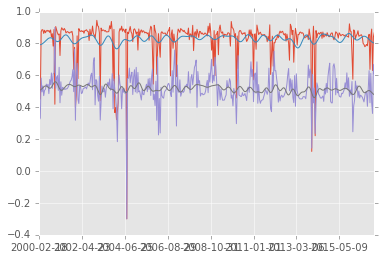

In [285]:
# Fourier decomposition
def fourierfilter(vi, fq_keep):
    vi = pd.Series(vi.values, index = range(len(vi.values)))               # re-build the series
    fdf = pd.DataFrame({'vi': vi})
    ## de-trend the time series by fitting a trend line
    fdf['vi_lm'] = fitline(fdf['vi'])
    fdf['residual'] = fdf['vi'] - fdf['vi_lm']
    # compute the discrete Fourier Transform
    vi_fft = np.fft.fft(fdf['residual'].values).real
    # remove the frequencies from index fq_keep to the last one
    vi_fft[fq_keep:] = 0
    # compute the inverse discrete Fourier Transform
    vi_ifft = np.fft.ifft(vi_fft).real
    # add the residuals back
    return(vi_ifft + fdf['vi_lm'].values)

vidf['ndvi_ff'] = fourierfilter(vidf['ndvi'], 25)
vidf['evi_ff'] = fourierfilter(vidf['evi'], 45)

# plot
vidf['ndvi'].plot()
vidf['ndvi_ff'].plot()
vidf['evi'].plot()
vidf['evi_ff'].plot()
vidf[0:5]

,evi,ndvi,ndvi_lm,evi_lm,ndvi_ff,evi_ff,ndvi.kf,evi.kf,ndvi_kf,evi_kf
2000-02-18,0.3227,0.5532,0.823311,0.530569,0.791676,0.507752,0.828515,0.515611,0.828515,0.515611
2000-03-05,0.3328,0.4512,0.823337,0.530492,0.792255,0.508760,0.622029,0.370928,0.622029,0.370928
2000-03-21,0.5831,0.8734,0.823364,0.530415,0.793921,0.511802,0.548816,0.354587,0.548816,0.354587
2000-04-06,0.4962,0.8865,0.823391,0.530339,0.796626,0.516467,0.646192,0.423141,0.646192,0.423141
2000-04-22,0.5341,0.8859,0.823417,0.530262,0.800278,0.522038,0.701647,0.440001,0.701647,0.440001


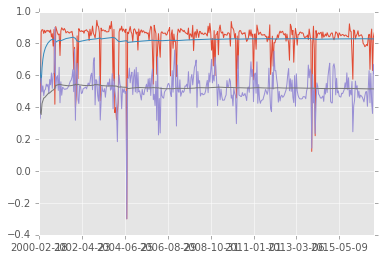

In [287]:
# Kalman filter

def kalmanfilter(vi):
    est   = np.zeros(len(vi))
    e_est = np.zeros(len(vi))
    kg    = np.zeros(len(vi))
    e_mea = vi.std()        # error_in_measurement
    est[0]   = vi.mean()    # initial estimate
    e_est[0] = 3 * vi.std() # initial_error_in_estimate
    kg[0]    = None
    for i in range(1, len(vi)):
        kg[i] = e_est[i - 1]/(e_est[i - 1] + e_mea)    # compute the Kalman gain
        m = vi[i - 1]
        if(np.isnan(m)):
            m = est[i - 1]                             # use the estimation when a measurement is missing
        est[i] = est[i - 1] + kg[i] * (m - est[i - 1]) # compute the new estimation
        e_est[i] = (1 - kg[i]) * e_est[i - 1]
    return est

vidf['ndvi_kf'] = pd.Series(kalmanfilter(ndvi), index = cv_scheme["timeline"])
vidf['evi_kf']  = pd.Series(kalmanfilter(evi), index = cv_scheme["timeline"])

vidf['ndvi'].plot()
vidf['ndvi_kf'].plot()
vidf['evi'].plot()
vidf['evi_kf'].plot()
vidf[0:5]

In [257]:
# DTW & TWDTW

### Other ESENSING projects

***LUBIA***
- What are the constraints?
- We're using MODIS MOD13Q1
- Simple interfaces enable clients for more complex applications
- We're mainly using R - SITS package - but we are open to explore python aplications
- 

What is missing?
- We like time series, but still, we need to see arrays as images *efficiently*
- Our SciDB implementation is slow for retrieving images
- results WMS link to Bolivia, Matto Grosso
- the spatial metadata (spatial) of arrays are not IN SciDB

WTSS:
- polygon selection
- summarization
- Today is LOCAL analysis, we need to move to FOCAL

We are working on a new WS for processing time series